In [1]:
import requests
import json
import pandas as pd
import time
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# define the API endpoint
endpoint = 'https://api.binance.com/api/v3/klines'

In [ ]:
# define the parameters for the API request
symbol = 'BTCUSDT'
interval = '2h'
startTime = '1496275200000'  # 2017-06-01 00:00:00
endTime = str(int(time.time()) * 1000)  # current time in milliseconds

In [ ]:
# create an empty DataFrame to store the results
cols = ['timestamp','open', 'high', 'low', 'close', 'volume', 'close_time',
        'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
        'taker_buy_quote_asset_volume', 'ignore']
df = pd.DataFrame(columns=cols)

In [ ]:
# loop through the API to get all available historical data
while True:
    # make the API request
    res = requests.get(endpoint, params={'symbol': symbol, 'interval': interval,
                                          'startTime': startTime, 'endTime': endTime,
                                          'limit': 1000})
    
    # check if the request was successful
    if res.status_code != 200:
        print(f'Request failed with status code {res.status_code}.')
        break
    
    # convert the response to a pandas DataFrame
    res_df = pd.DataFrame(res.json(), columns=cols)
    res_df = res_df.astype(float)
    res_df['timestamp'] = pd.to_datetime(res_df['timestamp'], unit='ms')
    res_df.set_index('timestamp', inplace=True)
    
    # append the results to the main DataFrame
    df = pd.concat([df, res_df])
    
    # check if we have reached the end of the available data
    if len(res_df) < 1000:
        break
    
    # update start time for next request
    startTime = str(int(res_df.index[-1].timestamp() * 1000))
    
    # sleep for 1 second before sending the next request
    time.sleep(1)

In [ ]:
# save data to CSV file
df.to_csv('btcusdt_quotes_6h.csv', index=False)

In [2]:
df = pd.read_csv('/content/btcusdt_quotes_2h.csv')
df

,index,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2017-08-17 04:00:00,NaN,4261.48,4328.69,4261.32,4315.32,70.415925,1.502950e+12,3.026710e+05,273.0,56.608574,2.435608e+05,0.0
1,2017-08-17 06:00:00,NaN,4330.29,4349.99,4287.41,4349.99,11.672940,1.502957e+12,5.052337e+04,61.0,7.405153,3.208666e+04,0.0
2,2017-08-17 08:00:00,NaN,4333.32,4445.78,4333.32,4444.00,11.736430,1.502964e+12,5.145886e+04,71.0,11.073055,4.854812e+04,0.0
3,2017-08-17 10:00:00,NaN,4441.10,4485.39,4399.81,4427.30,51.883452,1.502971e+12,2.310423e+05,177.0,47.714578,2.125059e+05,0.0
4,2017-08-17 12:00:00,NaN,4436.06,4459.00,4411.00,4459.00,54.344834,1.502978e+12,2.411032e+05,226.0,41.877036,1.858583e+05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,2021-01-26 22:00:00,NaN,31987.13,32921.88,31890.00,32467.77,5449.025131,1.611706e+12,1.771363e+08,145780.0,2960.441916,9.621765e+07,0.0
15072,2021-01-27 00:00:00,NaN,32464.01,32557.29,31880.00,32084.60,6362.761164,1.611713e+12,2.047879e+08,133374.0,3046.100212,9.805252e+07,0.0
15073,2021-01-27 02:00:00,NaN,32084.88,32263.56,31568.28,31800.86,4011.609562,1.611720e+12,1.281006e+08,99483.0,1899.136206,6.064614e+07,0.0
15074,2021-01-27 04:00:00,NaN,31801.27,32030.28,31365.41,31503.41,4213.558200,1.611727e+12,1.333442e+08,125748.0,2151.982070,6.810687e+07,0.0


In [3]:
df.index = pd.to_datetime(df['index'])
df.head()

,index,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
index,,,,,,,,,,,,,
2017-08-17 04:00:00,2017-08-17 04:00:00,NaN,4261.48,4328.69,4261.32,4315.32,70.415925,1.502950e+12,302670.961961,273.0,56.608574,243560.757671,0.0
2017-08-17 06:00:00,2017-08-17 06:00:00,NaN,4330.29,4349.99,4287.41,4349.99,11.672940,1.502957e+12,50523.370970,61.0,7.405153,32086.664239,0.0
2017-08-17 08:00:00,2017-08-17 08:00:00,NaN,4333.32,4445.78,4333.32,4444.00,11.736430,1.502964e+12,51458.859529,71.0,11.073055,48548.124975,0.0
2017-08-17 10:00:00,2017-08-17 10:00:00,NaN,4441.10,4485.39,4399.81,4427.30,51.883452,1.502971e+12,231042.298220,177.0,47.714578,212505.926179,0.0
2017-08-17 12:00:00,2017-08-17 12:00:00,NaN,4436.06,4459.00,4411.00,4459.00,54.344834,1.502978e+12,241103.158021,226.0,41.877036,185858.309682,0.0


In [ ]:
#

In [4]:
# select relevant features
close = df[['close']]
close

,close
index,
2017-08-17 04:00:00,4315.32
2017-08-17 06:00:00,4349.99
2017-08-17 08:00:00,4444.00
2017-08-17 10:00:00,4427.30
2017-08-17 12:00:00,4459.00
...,...
2021-01-26 22:00:00,32467.77
2021-01-27 00:00:00,32084.60
2021-01-27 02:00:00,31800.86


In [5]:
# rename index
close.index.rename('date_time', inplace=True)

<Axes: xlabel='date_time'>

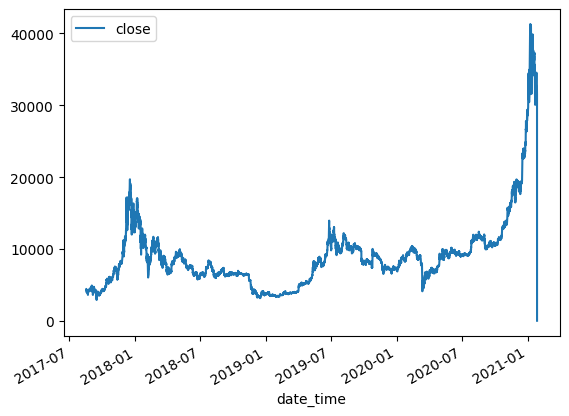

In [6]:
# plot the data
close.plot()

In [7]:
# scale the data
scaler = MinMaxScaler()
close['price_normalized'] = scaler.fit_transform(close[['close']])

<ipython-input-7-fd06eb29d544>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close['price_normalized'] = scaler.fit_transform(close[['close']])


In [8]:
close = close[['price_normalized']]
close

,price_normalized
date_time,
2017-08-17 04:00:00,0.103786
2017-08-17 06:00:00,0.104626
2017-08-17 08:00:00,0.106904
2017-08-17 10:00:00,0.106499
2017-08-17 12:00:00,0.107267
...,...
2021-01-26 22:00:00,0.785771
2021-01-27 00:00:00,0.776489
2021-01-27 02:00:00,0.769615


In [9]:
# create a function to reshape data 
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [ a for a in df_as_np[i:i+window_size] ]
        X.append(row)
        label = df_as_np[i+window_size][-1]  # get the last value in the window
        y.append(label)
    return np.array(X), np.array(y)[:, np.newaxis]

In [10]:
# set window size and apply our function
WINDOW_SIZE = 96 
X, y = df_to_X_y(close, WINDOW_SIZE)
X.shape, y.shape

((14980, 96, 1), (14980, 1))

In [11]:
# set aside 25% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.25, shuffle = False)

# use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, shuffle=False) 

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((8426, 96, 1), (8426, 1), (2809, 96, 1), (2809, 1), (3745, 96, 1), (3745, 1))

In [62]:
# define a sequential model
model2 = Sequential()
model2.add(InputLayer((WINDOW_SIZE, 1)))
model2.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(WINDOW_SIZE, 1)))
model2.add(Dropout(0.3))
model2.add(LSTM(64, activation='tanh', return_sequences=False))
model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='mse')

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 96, 64)            16896     
                                                                 
 dropout_17 (Dropout)        (None, 96, 64)            0         
                                                                 
 lstm_19 (LSTM)              (None, 64)                33024     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 52,033
Trainable params: 52,033
Non-trai

In [63]:
# fit the model
hystory = model2.fit(X_train, y_train, validation_data=(X_val, y_val), 
           epochs=30, batch_size=64)

Epoch 1/30
132/132 [==============================] - 29s 189ms/step - loss: 0.2122 - val_loss: 0.0738
Epoch 2/30
132/132 [==============================] - 24s 184ms/step - loss: 0.0325 - val_loss: 0.0089
Epoch 3/30
132/132 [==============================] - 24s 185ms/step - loss: 0.0040 - val_loss: 8.6445e-04
Epoch 4/30
132/132 [==============================] - 24s 180ms/step - loss: 8.6617e-04 - val_loss: 2.0857e-04
Epoch 5/30
132/132 [==============================] - 24s 183ms/step - loss: 5.3628e-04 - val_loss: 3.2992e-04
Epoch 6/30
132/132 [==============================] - 24s 183ms/step - loss: 4.7109e-04 - val_loss: 1.2031e-04
Epoch 7/30
132/132 [==============================] - 24s 182ms/step - loss: 4.5297e-04 - val_loss: 1.4837e-04
Epoch 8/30
132/132 [==============================] - 24s 182ms/step - loss: 4.8051e-04 - val_loss: 1.5397e-04
Epoch 9/30
132/132 [==============================] - 24s 180ms/step - loss: 4.8923e-04 - val_loss: 1.1127e-04
Epoch 10/30
132/132 [

In [64]:
#make a prediction
test_prediction = model2.predict(X_test)

118/118 [==============================] - 5s 36ms/step


In [65]:
# evaluate the model
test_loss = model2.evaluate(X_test, y_test)

118/118 [==============================] - 4s 35ms/step - loss: 0.0057


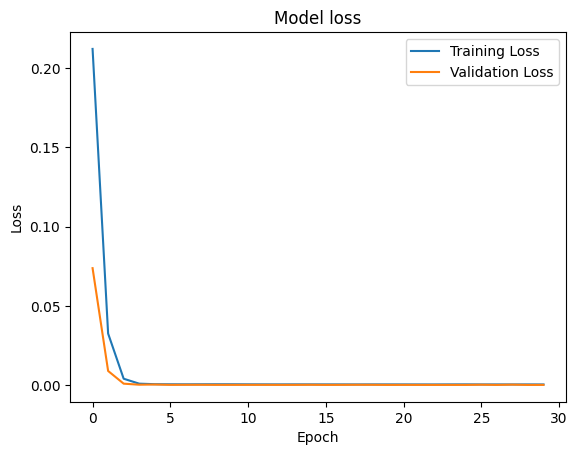

In [66]:
# get the training and validation loss
train_loss = hystory.history['loss']
val_loss = hystory.history['val_loss']

# plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [50]:
# convert the normalized predicted and actual test data back to their original scale
y_test_inverse = scaler.inverse_transform(y_test)
test_prediction_inverse = scaler.inverse_transform(test_prediction)

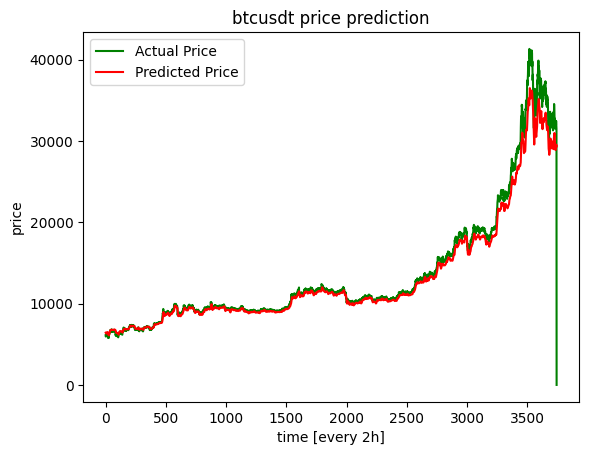

In [51]:
# visualize the model's performance by comparing the actual and predicted test prices on a line plot
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(test_prediction_inverse, label="Predicted Price", color='red')

plt.title('btcusdt price prediction')
plt.xlabel('time [every 2h]')
plt.ylabel('price')
plt.legend(loc='best')
 
plt.show()